# Agricultural Census data for the Island of Ireland

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

## ROI data

In [2]:
bound_ie = gpd.read_file(
    os.path.join(
        "data", "boundaries", "OSi", "osi_national_statutory_boundaries.gpkg"
    ),
    layer="electoral-divisions-2019"
)

In [3]:
bound_ie.head()

,ED_ID,ENGLISH,GAEILGE,CONTAE,COUNTY,PROVINCE,GUID,CENTROID_X,CENTROID_Y,AREA,ESRI_OID,Shape__Are,Shape__Len,geometry
0,267160,TURNAPIN,Turnapain,Baile Átha Cliath,DUBLIN,Leinster,2ae19629-1cea-13a3-e055-000000000001,717365.57,740807.88,943505.13,1,9.435051e+05,4732.251966,"POLYGON ((717716.712 741601.510, 717759.461 74..."
1,27045,DRUMLUMMAN,Droim Lomáin,An Cabhán,CAVAN,Ulster,2ae19629-1caa-13a3-e055-000000000001,638130.82,789588.69,17617760.82,2,1.761776e+07,21762.101454,"POLYGON ((637756.185 787640.988, 637753.646 78..."
2,117019,CASTLEFORE,Baile Choille Fóir,Liatroim,LEITRIM,Connacht,2ae19629-171c-13a3-e055-000000000001,606853.02,809670.32,14080012.63,3,1.408001e+07,21907.071044,"POLYGON ((608196.069 807618.950, 608244.536 80..."
3,37135,RAHONA,Ráth Úna,An Clár,CLARE,Munster,2ae19629-1fec-13a3-e055-000000000001,481634.87,649839.86,24664562.56,4,2.466456e+07,35830.867808,"POLYGON ((484212.068 651795.629, 484231.866 65..."
4,167021,CROSSAKEEL,Crosa Caoil,An Mhí,MEATH,Leinster,2ae19629-1861-13a3-e055-000000000001,662161.01,774125.96,20159197.51,5,2.015920e+07,34415.329703,"POLYGON ((663308.409 776111.796, 663305.294 77..."


In [4]:
bound_ie.shape

(3455, 14)

In [5]:
coa_ie = pd.read_csv(
    os.path.join("data", "agricultural_census", "CSO", "COA_2020.csv")
)

In [6]:
coa_ie.head()

,C03904V04656,electoral_division,total_cattle,total_sheep,total_grass_hectares
0,3576C59993454152E0530100007F0280,"Brisha / Capard, Co.Laois, 08045/08046",1955,420,964.3
1,3576C59992AD4152E0530100007F0280,"Firry / Newgrove, Co.Longford, 09024/09035",2164,675,965.4
2,2AE1962918C813A3E055000000000001,"Fair Gate, Co.Louth, 10001",0,0,0.0
3,2AE19629193513A3E055000000000001,"St. Laurence Gate, Co.Louth, 10002",0,0,0.0
4,2AE19629191E13A3E055000000000001,"West Gate, Co.Louth, 10003",0,0,0.0


In [7]:
coa_ie.shape

(3409, 5)

In [8]:
bound_ie["C03904V04656"] = (
    bound_ie["GUID"].replace("-", "", regex=True).str.upper()
)

In [9]:
bound_ie.head()

,ED_ID,ENGLISH,GAEILGE,CONTAE,COUNTY,PROVINCE,GUID,CENTROID_X,CENTROID_Y,AREA,ESRI_OID,Shape__Are,Shape__Len,geometry,C03904V04656
0,267160,TURNAPIN,Turnapain,Baile Átha Cliath,DUBLIN,Leinster,2ae19629-1cea-13a3-e055-000000000001,717365.57,740807.88,943505.13,1,9.435051e+05,4732.251966,"POLYGON ((717716.712 741601.510, 717759.461 74...",2AE196291CEA13A3E055000000000001
1,27045,DRUMLUMMAN,Droim Lomáin,An Cabhán,CAVAN,Ulster,2ae19629-1caa-13a3-e055-000000000001,638130.82,789588.69,17617760.82,2,1.761776e+07,21762.101454,"POLYGON ((637756.185 787640.988, 637753.646 78...",2AE196291CAA13A3E055000000000001
2,117019,CASTLEFORE,Baile Choille Fóir,Liatroim,LEITRIM,Connacht,2ae19629-171c-13a3-e055-000000000001,606853.02,809670.32,14080012.63,3,1.408001e+07,21907.071044,"POLYGON ((608196.069 807618.950, 608244.536 80...",2AE19629171C13A3E055000000000001
3,37135,RAHONA,Ráth Úna,An Clár,CLARE,Munster,2ae19629-1fec-13a3-e055-000000000001,481634.87,649839.86,24664562.56,4,2.466456e+07,35830.867808,"POLYGON ((484212.068 651795.629, 484231.866 65...",2AE196291FEC13A3E055000000000001
4,167021,CROSSAKEEL,Crosa Caoil,An Mhí,MEATH,Leinster,2ae19629-1861-13a3-e055-000000000001,662161.01,774125.96,20159197.51,5,2.015920e+07,34415.329703,"POLYGON ((663308.409 776111.796, 663305.294 77...",2AE19629186113A3E055000000000001


In [10]:
# merge boundaries and census data
data_ie = pd.merge(bound_ie, coa_ie, on="C03904V04656", how="outer")

In [11]:
data_ie.shape

(3487, 19)

In [12]:
# find data rows without a geometry
data_na = data_ie[data_ie["geometry"].isnull()][[
    "C03904V04656", "electoral_division", "total_cattle", "total_sheep",
    "total_grass_hectares"
]]

In [13]:
data_na

,C03904V04656,electoral_division,total_cattle,total_sheep,total_grass_hectares
3455,3576C59993454152E0530100007F0280,"Brisha / Capard, Co.Laois, 08045/08046",1955.0,420.0,964.3
3456,3576C59992AD4152E0530100007F0280,"Firry / Newgrove, Co.Longford, 09024/09035",2164.0,675.0,965.4
3457,3576C59993334152E0530100007F0280,"Esker / Ballaghassaan, Co.Offaly, 12043/12034",3830.0,923.0,1792.4
3458,3576C599940F4152E0530100007F0280,"Ballinalack / Lackan, Co.Westmeath, 13054/13085",2685.0,2311.0,1748.1
3459,3576C59994FC4152E0530100007F0280,"Noughaval / Castletown, Co.Clare, 16014/16008",4311.0,940.0,4445.3
3460,3576C59994AA4152E0530100007F0280,"Glenroe / Ballyeighter, Co.Clare, 16020/16017",2379.0,808.0,2450.5
3461,3576C59996354152E0530100007F0280,"Corlea / Cahermurphy, Co.Clare, 16128/16123",689.0,0.0,1051.5
3462,3576C59995BD4152E0530100007F0280,"Inishcaltra North / Inishcaltra South, Co.Clar...",2114.0,0.0,1094.7
3463,3576C599953E4152E0530100007F0280,"Bantry Rural / Whiddy, Co.Cork, 18033/18046",3387.0,2596.0,2411.1
3464,3576C59996CB4152E0530100007F0280,"Ceannúigh / Máistir Gaoithe, Co.Kerry, 19009/1...",1579.0,7615.0,4068.3


In [14]:
data_na.shape

(32, 5)

In [15]:
# manual merging
data_na_left = data_na.copy()
data_na_right = data_na.copy()

In [16]:
data_na_left["ENGLISH"] = (
    data_na_left["electoral_division"].str.split(expand=True, pat=" / ")[0]
)

In [17]:
data_na_left["COUNTY"] = (
    data_na_left["electoral_division"].str.split(
        expand=True, pat=" / "
    )[1].str.split(expand=True, pat=",")[1].str.split(expand=True, pat=" Co.")
)[1]

In [18]:
data_na_left.head()

,C03904V04656,electoral_division,total_cattle,total_sheep,total_grass_hectares,ENGLISH,COUNTY
3455,3576C59993454152E0530100007F0280,"Brisha / Capard, Co.Laois, 08045/08046",1955.0,420.0,964.3,Brisha,Laois
3456,3576C59992AD4152E0530100007F0280,"Firry / Newgrove, Co.Longford, 09024/09035",2164.0,675.0,965.4,Firry,Longford
3457,3576C59993334152E0530100007F0280,"Esker / Ballaghassaan, Co.Offaly, 12043/12034",3830.0,923.0,1792.4,Esker,Offaly
3458,3576C599940F4152E0530100007F0280,"Ballinalack / Lackan, Co.Westmeath, 13054/13085",2685.0,2311.0,1748.1,Ballinalack,Westmeath
3459,3576C59994FC4152E0530100007F0280,"Noughaval / Castletown, Co.Clare, 16014/16008",4311.0,940.0,4445.3,Noughaval,Clare


In [19]:
data_na_right["ENGLISH"] = (
    data_na_right["electoral_division"].str.split(
        expand=True, pat="/"
    )[1].str.split(expand=True, pat=", ")[0]
)

In [20]:
data_na_right["COUNTY"] = (
    data_na_right["electoral_division"].str.split(
        expand=True, pat=" / "
    )[1].str.split(expand=True, pat=",")[1].str.split(expand=True, pat=" Co.")
)[1]

In [21]:
data_na_right.head()

,C03904V04656,electoral_division,total_cattle,total_sheep,total_grass_hectares,ENGLISH,COUNTY
3455,3576C59993454152E0530100007F0280,"Brisha / Capard, Co.Laois, 08045/08046",1955.0,420.0,964.3,Capard,Laois
3456,3576C59992AD4152E0530100007F0280,"Firry / Newgrove, Co.Longford, 09024/09035",2164.0,675.0,965.4,Newgrove,Longford
3457,3576C59993334152E0530100007F0280,"Esker / Ballaghassaan, Co.Offaly, 12043/12034",3830.0,923.0,1792.4,Ballaghassaan,Offaly
3458,3576C599940F4152E0530100007F0280,"Ballinalack / Lackan, Co.Westmeath, 13054/13085",2685.0,2311.0,1748.1,Lackan,Westmeath
3459,3576C59994FC4152E0530100007F0280,"Noughaval / Castletown, Co.Clare, 16014/16008",4311.0,940.0,4445.3,Castletown,Clare


In [22]:
data_na = pd.concat([data_na_left, data_na_right])

In [23]:
data_na.shape

(64, 7)

In [24]:
# strip whitespace
data_na["ENGLISH"] = data_na["ENGLISH"].str.upper().str.strip()
data_na["COUNTY"] = data_na["COUNTY"].str.upper().str.strip()

In [25]:
data_na.head()

,C03904V04656,electoral_division,total_cattle,total_sheep,total_grass_hectares,ENGLISH,COUNTY
3455,3576C59993454152E0530100007F0280,"Brisha / Capard, Co.Laois, 08045/08046",1955.0,420.0,964.3,BRISHA,LAOIS
3456,3576C59992AD4152E0530100007F0280,"Firry / Newgrove, Co.Longford, 09024/09035",2164.0,675.0,965.4,FIRRY,LONGFORD
3457,3576C59993334152E0530100007F0280,"Esker / Ballaghassaan, Co.Offaly, 12043/12034",3830.0,923.0,1792.4,ESKER,OFFALY
3458,3576C599940F4152E0530100007F0280,"Ballinalack / Lackan, Co.Westmeath, 13054/13085",2685.0,2311.0,1748.1,BALLINALACK,WESTMEATH
3459,3576C59994FC4152E0530100007F0280,"Noughaval / Castletown, Co.Clare, 16014/16008",4311.0,940.0,4445.3,NOUGHAVAL,CLARE


In [26]:
# manually change names to English
names = {
    "CEANNÚIGH": "CANUIG",
    "DOIRE IANNA": "DERRIANA",
    "AGHAVOGHILL": "AGHAVOGHIL",
    "LOUGHILL": "LOUGHIL",
    "MÁISTIR GAOITHE": "MASTERGEEHY"
}
data_na.replace({"ENGLISH": names}, inplace=True)

In [27]:
# drop these entries from the original dataframe
coa_ie = coa_ie[~coa_ie["C03904V04656"].isin(list(data_na["C03904V04656"]))]

In [28]:
coa_ie.shape

(3377, 5)

In [29]:
# merge boundaries and census data again
data_ie = pd.merge(bound_ie, coa_ie, on="C03904V04656", how="outer")

In [30]:
data_ie.shape

(3455, 19)

In [31]:
data_ie = pd.merge(data_ie, data_na, how="outer", on=["ENGLISH", "COUNTY"])

In [32]:
data_ie.head()

,ED_ID,ENGLISH,GAEILGE,CONTAE,COUNTY,PROVINCE,GUID,CENTROID_X,CENTROID_Y,AREA,...,C03904V04656_x,electoral_division_x,total_cattle_x,total_sheep_x,total_grass_hectares_x,C03904V04656_y,electoral_division_y,total_cattle_y,total_sheep_y,total_grass_hectares_y
0,267160,TURNAPIN,Turnapain,Baile Átha Cliath,DUBLIN,Leinster,2ae19629-1cea-13a3-e055-000000000001,717365.57,740807.88,943505.13,...,2AE196291CEA13A3E055000000000001,"Turnapin, Co.Dublin, 04042",0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,27045,DRUMLUMMAN,Droim Lomáin,An Cabhán,CAVAN,Ulster,2ae19629-1caa-13a3-e055-000000000001,638130.82,789588.69,17617760.82,...,2AE196291CAA13A3E055000000000001,"Drumlumman, Co.Cavan, 32089",2673.0,231.0,1249.1,NaN,NaN,NaN,NaN,NaN
2,117019,CASTLEFORE,Baile Choille Fóir,Liatroim,LEITRIM,Connacht,2ae19629-171c-13a3-e055-000000000001,606853.02,809670.32,14080012.63,...,2AE19629171C13A3E055000000000001,"Castlefore, Co.Leitrim, 28063",630.0,0.0,805.9,NaN,NaN,NaN,NaN,NaN
3,37135,RAHONA,Ráth Úna,An Clár,CLARE,Munster,2ae19629-1fec-13a3-e055-000000000001,481634.87,649839.86,24664562.56,...,2AE196291FEC13A3E055000000000001,"Rahona, Co.Clare, 16101",2369.0,0.0,1349.9,NaN,NaN,NaN,NaN,NaN
4,167021,CROSSAKEEL,Crosa Caoil,An Mhí,MEATH,Leinster,2ae19629-1861-13a3-e055-000000000001,662161.01,774125.96,20159197.51,...,2AE19629186113A3E055000000000001,"Crossakeel, Co.Meath, 11061",4826.0,671.0,2014.1,NaN,NaN,NaN,NaN,NaN


In [33]:
# finishing merges
data_ie.fillna(0, inplace=True)

In [34]:
data_ie["total_cattle"] = data_ie["total_cattle_x"] + data_ie["total_cattle_y"]
data_ie["total_sheep"] = data_ie["total_sheep_x"] + data_ie["total_sheep_y"]
data_ie["total_grass_hectares"] = (
    data_ie["total_grass_hectares_x"] + data_ie["total_grass_hectares_y"]
)

In [35]:
data_ie.replace({"electoral_division_x": {0.0: ""}}, inplace=True)
data_ie.replace({"electoral_division_y": {0.0: ""}}, inplace=True)

In [36]:
data_ie["electoral_division"] = (
    data_ie["electoral_division_x"].astype(str) +
    data_ie["electoral_division_y"].astype(str)
)

In [37]:
# drop unnecessary columns
data_ie.drop(
    columns=[
        "C03904V04656_x", "electoral_division_x", "total_cattle_x",
        "total_sheep_x", "total_grass_hectares_x",
        "C03904V04656_y", "electoral_division_y", "total_cattle_y",
        "total_sheep_y", "total_grass_hectares_y"
    ],
    inplace=True
)

In [38]:
data_ie.head()

,ED_ID,ENGLISH,GAEILGE,CONTAE,COUNTY,PROVINCE,GUID,CENTROID_X,CENTROID_Y,AREA,ESRI_OID,Shape__Are,Shape__Len,geometry,total_cattle,total_sheep,total_grass_hectares,electoral_division
0,267160,TURNAPIN,Turnapain,Baile Átha Cliath,DUBLIN,Leinster,2ae19629-1cea-13a3-e055-000000000001,717365.57,740807.88,943505.13,1,9.435051e+05,4732.251966,"POLYGON ((717716.712 741601.510, 717759.461 74...",0.0,0.0,0.0,"Turnapin, Co.Dublin, 04042"
1,27045,DRUMLUMMAN,Droim Lomáin,An Cabhán,CAVAN,Ulster,2ae19629-1caa-13a3-e055-000000000001,638130.82,789588.69,17617760.82,2,1.761776e+07,21762.101454,"POLYGON ((637756.185 787640.988, 637753.646 78...",2673.0,231.0,1249.1,"Drumlumman, Co.Cavan, 32089"
2,117019,CASTLEFORE,Baile Choille Fóir,Liatroim,LEITRIM,Connacht,2ae19629-171c-13a3-e055-000000000001,606853.02,809670.32,14080012.63,3,1.408001e+07,21907.071044,"POLYGON ((608196.069 807618.950, 608244.536 80...",630.0,0.0,805.9,"Castlefore, Co.Leitrim, 28063"
3,37135,RAHONA,Ráth Úna,An Clár,CLARE,Munster,2ae19629-1fec-13a3-e055-000000000001,481634.87,649839.86,24664562.56,4,2.466456e+07,35830.867808,"POLYGON ((484212.068 651795.629, 484231.866 65...",2369.0,0.0,1349.9,"Rahona, Co.Clare, 16101"
4,167021,CROSSAKEEL,Crosa Caoil,An Mhí,MEATH,Leinster,2ae19629-1861-13a3-e055-000000000001,662161.01,774125.96,20159197.51,5,2.015920e+07,34415.329703,"POLYGON ((663308.409 776111.796, 663305.294 77...",4826.0,671.0,2014.1,"Crossakeel, Co.Meath, 11061"


In [39]:
data_ie.shape

(3455, 18)

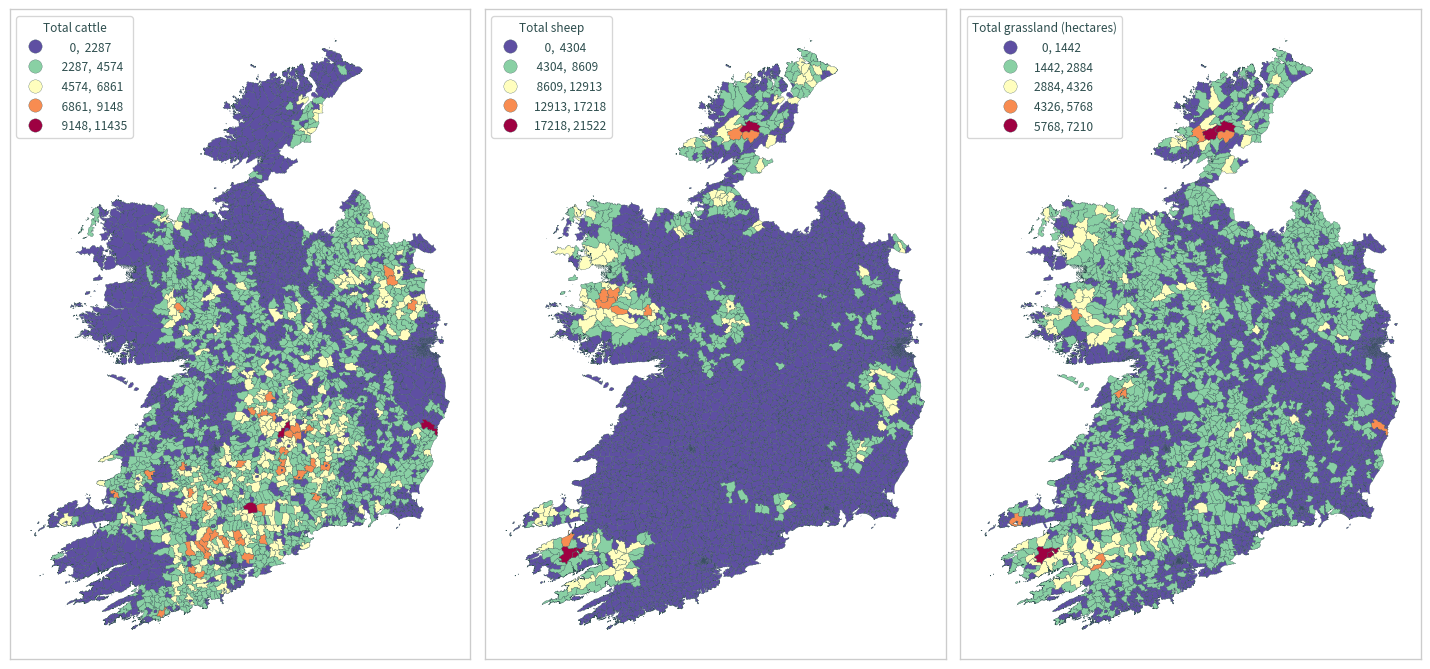

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
cols = [
    ("total_cattle", "Total cattle"),
    ("total_sheep", "Total sheep"),
    ("total_grass_hectares", "Total grassland (hectares)")
]
for i, ax in enumerate(axs.flat):
    data_ie.plot(
        column=cols[i][0], ax=ax, cmap="Spectral_r", scheme="equal_interval",
        edgecolor="darkslategrey", linewidth=.2, legend=True,
        legend_kwds={
            "loc": "upper left", "fmt": "{:.0f}", "title": cols[i][1]
        }
    )
    # ax.ticklabel_format(style="scientific", scilimits=[-4, 4])
    ax.tick_params(labelbottom=False, labelleft=False)
    for legend_handle in ax.get_legend().legendHandles:
        legend_handle.set_markeredgewidth(.2)
        legend_handle.set_markeredgecolor("darkslategrey")
plt.tight_layout()
plt.show()

## NI data

In [48]:
bound_ni = gpd.read_file(
    os.path.join("data", "boundaries", "ONS", "ons_geography.gpkg"),
    layer="ni_wards_12_2022_2157"
)

In [49]:
bound_ni.head()

,OBJECTID,WD22CD,WD22NM,WD22NMW,LAD22CD,LAD22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
0,6905,N08000101,Abbey,None,N09000001,Antrim and Newtownabbey,148871,538433,-5.89564,54.677608,{5BDA2CD0-D7CB-4D6B-90EB-75F8A1FFD7A4},5291.934708,9.102273e+05,"POLYGON ((736083.766 883168.756, 736079.853 88..."
1,6906,N08000102,Aldergrove,None,N09000001,Antrim and Newtownabbey,123312,535417,-6.28810,54.637211,{EF80E5AC-3B27-4D56-9BB3-0CBFE94D7642},66396.070829,1.562231e+08,"POLYGON ((716585.770 885559.814, 716589.067 88..."
2,6907,N08000103,Antrim Centre,None,N09000001,Antrim and Newtownabbey,126897,544127,-6.24085,54.717220,{2900E2DF-24DB-45B8-8266-663DDF1D3BDF},17140.311467,1.062755e+07,"POLYGON ((713846.305 888779.215, 713856.936 88..."
3,6908,N08000104,Ballyclare East,None,N09000001,Antrim and Newtownabbey,142993,547438,-5.99452,54.755379,{ED83EA03-CE92-4D89-B5C4-BEB02CD9A528},8186.240587,1.828746e+06,"POLYGON ((728893.847 890935.685, 728892.974 89..."
4,6909,N08000105,Ballyclare West,None,N09000001,Antrim and Newtownabbey,141887,547417,-6.01165,54.754620,{0835C4C3-E634-4DEC-B0BE-3A67BFF613C7},8307.724846,1.782133e+06,"POLYGON ((728672.484 892458.897, 728669.323 89..."


In [50]:
bound_ni.shape

(462, 14)

In [51]:
coa_ni = pd.read_csv(
    os.path.join(
        "data", "agricultural_census", "DAERA",
        "daera_agricultural_census.csv"
    )
)

In [52]:
coa_ni.head()

,ward_2014_code,ward_2014_name,year,total_grass_hectares,total_cattle,total_sheep
0,N08000101,Abbey (Antrim and Newtownabbey),2018,3,3,3
1,N08000102,Aldergrove,2018,5676,10784,15053
2,N08000103,Antrim Centre,2018,3,3,3
3,N08000104,Ballyclare East,2018,3,3,3
4,N08000105,Ballyclare West,2018,148,207,152


In [53]:
coa_ni.shape

(462, 6)

In [54]:
coa_ni.rename(columns={"ward_2014_code": "WD22CD"}, inplace=True)

In [55]:
data_ni = pd.merge(bound_ni, coa_ni, on=["WD22CD"])

In [56]:
data_ni.head()

,OBJECTID,WD22CD,WD22NM,WD22NMW,LAD22CD,LAD22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area,geometry,ward_2014_name,year,total_grass_hectares,total_cattle,total_sheep
0,6905,N08000101,Abbey,None,N09000001,Antrim and Newtownabbey,148871,538433,-5.89564,54.677608,{5BDA2CD0-D7CB-4D6B-90EB-75F8A1FFD7A4},5291.934708,9.102273e+05,"POLYGON ((736083.766 883168.756, 736079.853 88...",Abbey (Antrim and Newtownabbey),2018,3,3,3
1,6906,N08000102,Aldergrove,None,N09000001,Antrim and Newtownabbey,123312,535417,-6.28810,54.637211,{EF80E5AC-3B27-4D56-9BB3-0CBFE94D7642},66396.070829,1.562231e+08,"POLYGON ((716585.770 885559.814, 716589.067 88...",Aldergrove,2018,5676,10784,15053
2,6907,N08000103,Antrim Centre,None,N09000001,Antrim and Newtownabbey,126897,544127,-6.24085,54.717220,{2900E2DF-24DB-45B8-8266-663DDF1D3BDF},17140.311467,1.062755e+07,"POLYGON ((713846.305 888779.215, 713856.936 88...",Antrim Centre,2018,3,3,3
3,6908,N08000104,Ballyclare East,None,N09000001,Antrim and Newtownabbey,142993,547438,-5.99452,54.755379,{ED83EA03-CE92-4D89-B5C4-BEB02CD9A528},8186.240587,1.828746e+06,"POLYGON ((728893.847 890935.685, 728892.974 89...",Ballyclare East,2018,3,3,3
4,6909,N08000105,Ballyclare West,None,N09000001,Antrim and Newtownabbey,141887,547417,-6.01165,54.754620,{0835C4C3-E634-4DEC-B0BE-3A67BFF613C7},8307.724846,1.782133e+06,"POLYGON ((728672.484 892458.897, 728669.323 89...",Ballyclare West,2018,148,207,152


In [57]:
data_ni.shape

(462, 19)

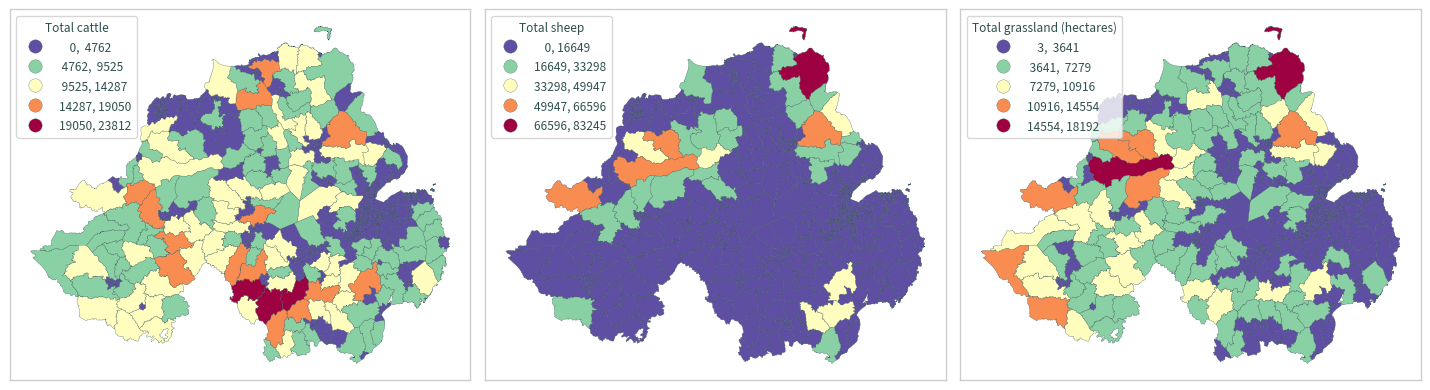

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15), sharey=True)
cols = [
    ("total_cattle", "Total cattle"),
    ("total_sheep", "Total sheep"),
    ("total_grass_hectares", "Total grassland (hectares)")
]
for i, ax in enumerate(axs.flat):
    data_ni.plot(
        column=cols[i][0], ax=ax, cmap="Spectral_r", scheme="equal_interval",
        edgecolor="darkslategrey", linewidth=.2, legend=True,
        legend_kwds={
            "loc": "upper left", "fmt": "{:.0f}", "title": cols[i][1]
        }
    )
    # ax.ticklabel_format(style="scientific", scilimits=[-4, 4])
    ax.tick_params(labelbottom=False, labelleft=False)
    for legend_handle in ax.get_legend().legendHandles:
        legend_handle.set_markeredgewidth(.2)
        legend_handle.set_markeredgecolor("darkslategrey")
plt.tight_layout()
plt.show()

## Merge

In [59]:
# subset data
data_ie = data_ie[[
    "ENGLISH", "COUNTY", "PROVINCE", "GUID", "total_cattle", "total_sheep",
    "total_grass_hectares", "electoral_division", "geometry"
]]

In [60]:
data_ni = data_ni[[
    "WD22CD", "WD22NM", "ward_2014_name", "total_cattle", "total_sheep",
    "total_grass_hectares", "geometry"
]]

In [61]:
data_ie[[
    "total_cattle", "total_sheep", "total_grass_hectares"
]] = data_ie[[
    "total_cattle", "total_sheep", "total_grass_hectares"
]].astype(float)
data_ni[[
    "total_cattle", "total_sheep", "total_grass_hectares"
]] = data_ni[[
    "total_cattle", "total_sheep", "total_grass_hectares"
]].astype(float)

/home/nms/miniconda3/envs/ClimAg/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/nms/miniconda3/envs/ClimAg/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [62]:
data_ni["ENGLISH"] = data_ni["WD22NM"].str.upper()
data_ni["PROVINCE"] = "Ulster"

/home/nms/miniconda3/envs/ClimAg/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/nms/miniconda3/envs/ClimAg/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [63]:
data = pd.merge(data_ie, data_ni, how="outer")

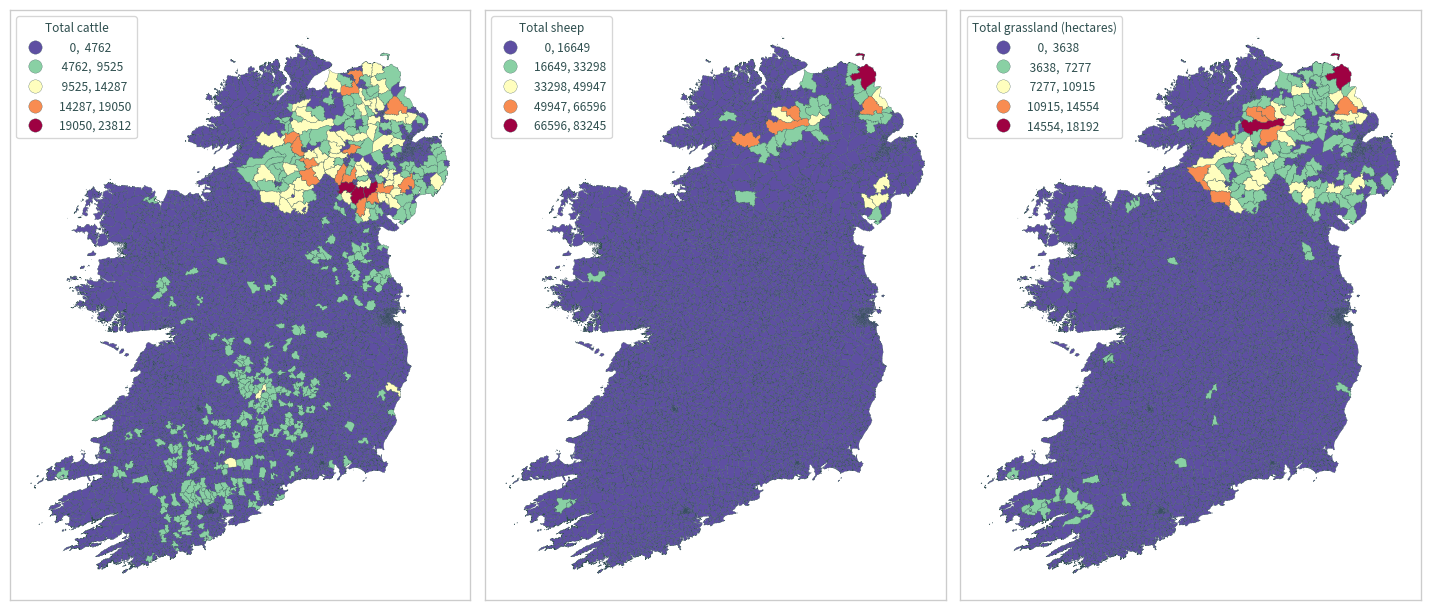

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15), sharey=True)
cols = [
    ("total_cattle", "Total cattle"),
    ("total_sheep", "Total sheep"),
    ("total_grass_hectares", "Total grassland (hectares)")
]
for i, ax in enumerate(axs.flat):
    data.plot(
        column=cols[i][0], ax=ax, cmap="Spectral_r", scheme="equal_interval",
        edgecolor="darkslategrey", linewidth=.2, legend=True,
        legend_kwds={
            "loc": "upper left", "fmt": "{:.0f}", "title": cols[i][1]
        }
    )
    # ax.ticklabel_format(style="scientific", scilimits=[-4, 4])
    ax.tick_params(labelbottom=False, labelleft=False)
    for legend_handle in ax.get_legend().legendHandles:
        legend_handle.set_markeredgewidth(.2)
        legend_handle.set_markeredgecolor("darkslategrey")
plt.tight_layout()
plt.show()

## Stocking rate

In [65]:
data.loc[data["total_grass_hectares"] == 0.0, "stocking_rate"] = 0.0
data.loc[data["total_grass_hectares"] > 0.0, "stocking_rate"] = (
    (data["total_cattle"] * 0.8 + data["total_sheep"] * 0.1) /
    data["total_grass_hectares"]
)

In [66]:
data["stocking_rate"].max()

5.627624825011666

In [67]:
data["stocking_rate"].min()

0.0

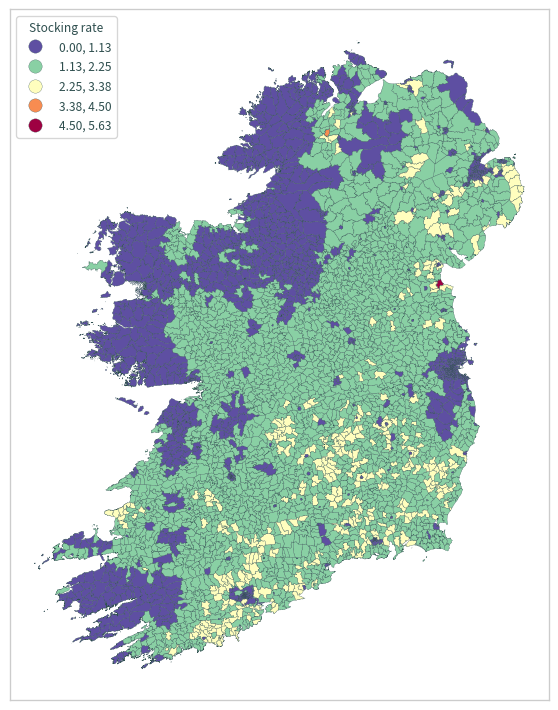

In [71]:
axs = data.plot(
    column="stocking_rate", cmap="Spectral_r", scheme="equal_interval",
    edgecolor="darkslategrey", linewidth=.2, figsize=(7.5, 7.5), legend=True,
    legend_kwds={
        "loc": "upper left", "fmt": "{:.2f}", "title": "Stocking rate"
    }
)
plt.ticklabel_format(style="scientific", scilimits=[-4, 4])
for legend_handle in axs.get_legend().legendHandles:
    legend_handle.set_markeredgewidth(.2)
    legend_handle.set_markeredgecolor("darkslategrey")
axs.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [103]:
data.to_file(
    os.path.join("data", "agricultural_census", "agricultural_census.gpkg"),
    layer="stocking_rate"
)